In [3]:
# 5.10 Original model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 14ms/step - loss: 0.5188 - accuracy: 0.7827 - val_loss: 0.3953 - val_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.9001 - val_loss: 0.3081 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.9257 - val_loss: 0.2796 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1709 - accuracy: 0.9444 - val_loss: 0.2746 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1401 - accuracy: 0.9548 - val_loss: 0.2834 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1126 - accuracy: 0.9643 - val_loss: 0.3231 - val_accuracy: 0.8780
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9712 - val_loss: 0.3220 - val_accuracy: 0.8828
Epoch 8/20
30/30 [=

In [4]:
# 5.11 Version of the model with lower capacity
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(train_data, train_labels,
                                  epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 11ms/step - loss: 0.6102 - accuracy: 0.6920 - val_loss: 0.5345 - val_accuracy: 0.7842
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.8603 - val_loss: 0.4309 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.9075 - val_loss: 0.3712 - val_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2863 - accuracy: 0.9251 - val_loss: 0.3173 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9349 - val_loss: 0.2930 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.9441 - val_loss: 0.2806 - val_accuracy: 0.8922
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9509 - val_loss: 0.2773 - val_accuracy: 0.8901
Epoch 8/20
30/30 [=

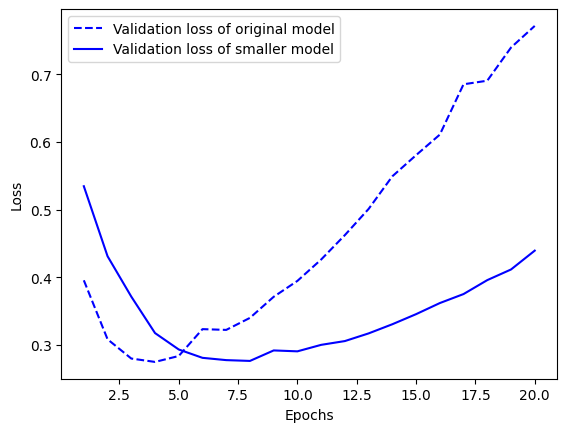

In [9]:
import matplotlib.pyplot as plt

val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--", label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b", label="Validation loss of smaller model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [10]:
# 5.12 Version of the model with higher capacity
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_larger_model = model.fit(train_data, train_labels,
                                 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5557 - accuracy: 0.7577 - val_loss: 0.3231 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2451 - accuracy: 0.9021 - val_loss: 0.3270 - val_accuracy: 0.8602
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1450 - accuracy: 0.9448 - val_loss: 0.3200 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0826 - accuracy: 0.9720 - val_loss: 0.3573 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0896 - accuracy: 0.9772 - val_loss: 0.3297 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.5251 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 9.1836e-04 - accuracy: 0.9999 - val_loss: 0.6227 - val_accuracy: 0.8869
Epoch 8/2

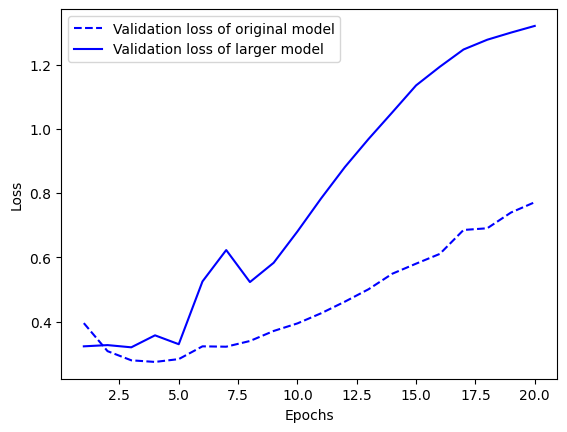

In [11]:
val_loss_larger = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--", label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b", label="Validation loss of larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [20]:
# 5.13 Adding L2 weight regularisation to the model
from tensorflow.keras import regularizers

# l2(0.002) means every coefficient in the weight matrix of the layer will
# add 0.002 * weight_coefficient_value ** 2 to the total loss of the model
# This does increase the model's training time
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 13ms/step - loss: 0.5822 - accuracy: 0.7911 - val_loss: 0.4646 - val_accuracy: 0.8558
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3912 - accuracy: 0.9021 - val_loss: 0.4030 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.9127 - val_loss: 0.3691 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.9263 - val_loss: 0.3968 - val_accuracy: 0.8681
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.9317 - val_loss: 0.3587 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2678 - accuracy: 0.9374 - val_loss: 0.3768 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.9376 - val_loss: 0.3633 - val_accuracy: 0.8858
Epoch 8/20
30/30 [=

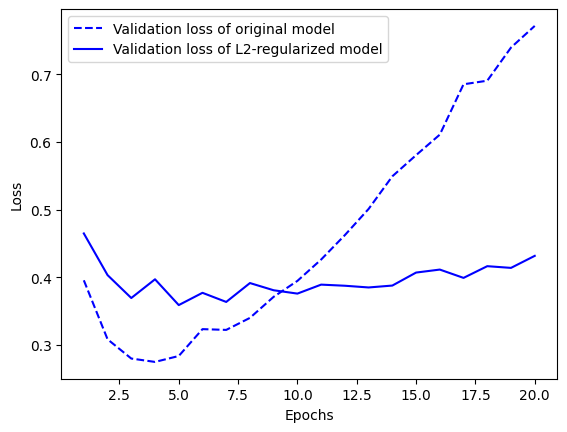

In [21]:
val_loss_l2 = history_l2_reg.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--", label="Validation loss of original model")
plt.plot(epochs, val_loss_l2, "b", label="Validation loss of L2-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [22]:
# 5.14 Different weight regularizers avaibale in Keras
from tensorflow.keras import regularizers
regularizers.l1(0.001) # l1 regularisation
regularizers.l1_l2(l1=0.001, l2=0.001) # simutaneous l1 and l2 regularisation

In [23]:
# 5.15 Adding propout to the IMBD model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 13ms/step - loss: 0.6310 - accuracy: 0.6439 - val_loss: 0.5267 - val_accuracy: 0.8503
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5074 - accuracy: 0.7737 - val_loss: 0.4057 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4199 - accuracy: 0.8306 - val_loss: 0.3452 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3627 - accuracy: 0.8563 - val_loss: 0.3038 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3177 - accuracy: 0.8827 - val_loss: 0.2829 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2800 - accuracy: 0.8988 - val_loss: 0.2739 - val_accuracy: 0.8933
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2462 - accuracy: 0.9119 - val_loss: 0.2751 - val_accuracy: 0.8913
Epoch 8/20
30/30 [=

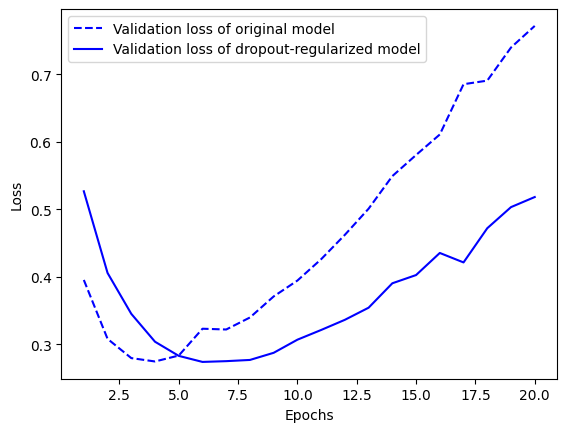

In [24]:
val_loss_dropout = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--", label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b", label="Validation loss of dropout-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()